In [1]:
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
matplotlib.use('TkAgg')

Populating the interactive namespace from numpy and matplotlib


In [31]:
#Importing Data from the CSV file
import os
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1")
print("Path has been changed to:\n", os.getcwd())

import numpy as np
#Importing Data X from the CSV file
X = np.genfromtxt('linearX.csv', delimiter='\n')

#Reshape X to add the Intercept term. Since n=1 here, X should be a 2x100 matrix. 
X=np.reshape(X, (-1,1))
X= np.append(np.ones((X.shape)), X, axis=1)
print(X.shape)

#Importing Data Y from the CSV file
Y = np.genfromtxt('linearY.csv', delimiter='\n')
Y = np.reshape(Y, (-1,1))
print(Y.shape)
#print(X, Y)
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1")
print("Path changed back to python file directory:\n", os.getcwd())

m = X.shape[0]
n = X.shape[1]
print(m,n)

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q1
(100, 2)
(100, 1)
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques1
100 2


In [32]:
#parameter initialization
theta = np.zeros((2,1)) #initialize to zero
#theta = np.random.rand(2,1)
print(type(theta))
print(theta)
alpha = 0.0001 # Learning Rate
#The model gives error on LR below 1e-4 (NAN)
print("Learning Rate=", alpha)

<class 'numpy.ndarray'>
[[0.]
 [0.]]
Learning Rate= 0.0001


In [33]:
#define the hypothesis function
h_x = np.dot(X, theta)
#print(h_x.shape)
#print(X[1,0])
#print(Y.shape)

In [34]:
#define the cost function
def cost(X, theta, Y):
    h_x = np.dot(X, theta)
    cost = (1/2*X.shape[0]) * np.sum((Y-h_x)**2)
    return cost
cost_final = cost(X, theta, Y)
print(cost_final)

4966.279047145


In [35]:
#function for calculating the cost function gradient

def cost_grad(X, theta, Y):
   # print(X.shape)
   # print(Y.shape)
    temp = np.dot(X, theta)-Y
   # print(temp.shape)
    #theta_grad = np.zeros((1,2))
    theta_grad = np.zeros((2,1))
    theta_grad += np.dot(X.transpose(), temp)
    #for i in range(m):
        #theta_grad += temp[i] * X[i, 0:2]
        #theta_grad[0] += temp[i] * X[i, 0]
        #theta_grad[1] += temp[i] * X[i, 1]
    #print(theta_grad)
    #return theta_grad.transpose()
    return theta_grad    

temp = h_x-Y
theta_grad = np.zeros((2,1))
arr = X[1, 0:2]
print(arr.shape)
print(temp[1,0])
print(temp[1,0]*arr)
print(theta_grad.shape)
theta_grad = temp[1,0]*arr
print(theta_grad.shape)


In [7]:
#Method 1 - Without Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [8]:
#Method 2 - Without Normalization, and termination based on cost function
print(cost_final)
i=0
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
    
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

4966.279047145
0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 1


In [9]:
#Method 3 - Without Normalization, and termination based on change in the cost function
i=0
print(cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print("Cost is = {} in iterations = {}".format(cost_final, i))

0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 0


Text(0, 0.5, 'y axis - value')

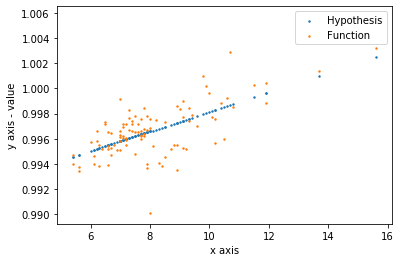

In [10]:
yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
#plt.savefig('plot_theta_1e-4_un.png', dpi=1000, bbox_inches='tight')

In [36]:
#Normalization of the Input X

mean = np.mean(X[0:101,1])
var = np.std(X[0:101,1])**2
print(mean)
X[0:101,1] -= mean
X[0:101,1] /= var
#print(X)

# meanY = np.mean(Y)
# varY = np.std(Y)
# print(varY)
# print(meanY)
# Y =Y- meanY
# Y /= varY
#print(Y)


8.062


In [37]:
np.std(X)

0.6468369368492287

#Run cells 2, 3, and 4 after running cell 9 

In [13]:
#Method 1 - With Normalization, Fixed EPOCHS = 10000-50000

for i in range(50000):
    #if i % 1000 == 0:
    #    print('{} steps done'.format(i))
    theta -= alpha * cost_grad(X, theta, Y)


In [14]:
#Method 2 - With Normalization, and termination based on cost function
i=0
print(cost_final)
while(cost_final >= 0.02):
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    i+=1
print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

0.011947898109836578
0.011947898109836578
Cost is = 0.011947898109836578 in iterations = 0


In [38]:
#Method 3 - With Normalization, and termination based on change in the cost function
i=0
alpha=0.05
cost_list= np.array([cost_final])
theta_all = theta
print(theta_all)
print(cost_final)
#cost_list = np.append(cost_list, cost_final)
while(abs(cost_grad(X, theta, Y)[1]) >= 0.0001):
    theta_all = np.append(theta_all,theta,axis=1)
    theta -= alpha * cost_grad(X, theta, Y)
    cost_final = cost(X, theta, Y)
    cost_list = np.append(cost_list, cost_final)
    #cost_list.append(cost_final)
    #print(type(theta))
    #print(theta_all)
    i+=1

print(cost_final)
print("Cost is = {} in iterations = {}".format(cost_final, i))

[[0.]
 [0.]]
4966.279047145
inf
Cost is = inf in iterations = 510


/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.


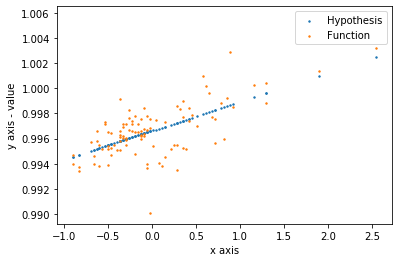

In [26]:

yhyp = np.dot(X, theta)
#print(yhyp)
plt.scatter(X[0:100,1], yhyp, s = 2, label='Hypothesis')
plt.scatter(X[0:100,1], Y, s = 2, label='Function')
plt.legend()
plt.xlabel('x axis')
plt.ylabel('y axis - value')
plt.show()
#plt.savefig('plot_theta_1e-4_norm.png', dpi=1000, bbox_inches='tight')

In [27]:
print(theta)

[[0.9966201 ]
 [0.00230718]]


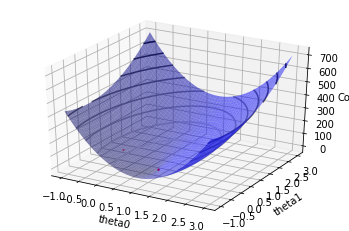

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import collections

def error(t0, t1, points):
    temp_theta=np.array([[t0],[t1]])
    temp_hx=np.dot(points[0].x, temp_theta)
    totalError = np.sum((points[0].y - temp_hx) ** 2)
    return totalError

x = X
y = Y
Point = collections.namedtuple('Point', ['x', 'y'])
points = [Point(x, y)]
#print(points[0].x.shape)
#print(len(points))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ms = theta_all[0]
# bs = theta_all[1]
# ms = ms[0::10]
# bs = bs[0::10]
theta0 = np.linspace(-1.0,3.0, 50)
theta1 = np.linspace(-1.0,3.0, 50)
theta0, theta1 = np.meshgrid(theta0, theta1)
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta0), np.ravel(theta1))])
cost_plot = cost_error.reshape(theta0.shape)


#Plot scatter for actual theta's
theta_all0 = theta_all[0][0::10]
theta_all1 = theta_all[1][0::10]

theta_all0, theta_all1 = np.meshgrid(theta_all0,theta_all1)
cost_error = np.array([error(t0, t1, points) 
               for t0, t1 in zip(np.ravel(theta_all0), np.ravel(theta_all1))])
cost_actual = cost_error.reshape(theta_all0.shape)
ax.plot_surface(theta0, theta1, cost_plot, rstride=1, cstride=1, color='b', alpha=0.5)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
ax.contour3D(theta0, theta1, cost_plot, 10, cmap='binary')
ax.scatter(theta_all0, theta_all1, cost_actual, c='red', marker='o', s=1, depthshade=True)

# points, = ax.plot([], [], [], marker='o', c='r')
# xdata, ydata, cost_a = [], [], []
# def init():
#     points.set_data([], [], [])
#     return points,
# def animate(i):
#     xdata.append(np.ravel(theta_all0)[i])
#     ydata.append(np.ravel(theta_all1)[i])
#     zdata.append(np.ravel(cost_actual[i]))
#     points.set_data(xdata, ydata, zdata)
#     return points,

# anim = FuncAnimation(fig, animate, init_func=init,
#                                frames=np.arange(0, 100), blit=True)
# HTML(anim.to_html5_video())

In [29]:
#fig.savefig('plot_cost.png', dpi=1000, bbox_inches='tight')

Text(0, 0.5, 'theta1')

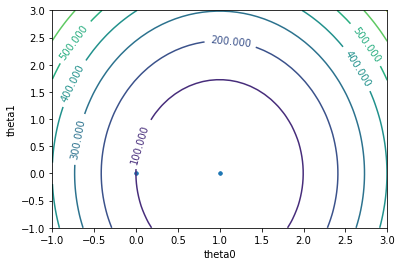

In [30]:
cp=plt.contour(theta0, theta1, cost_plot)
#plt.xlim(right=np.amax(theta0), left=np.amin(theta0))
#plt.ylim(top=np.amax(theta1), bottom=np.amin(theta1))
plt.scatter(theta_all0, theta_all1, marker='o', s=10)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('theta0')
plt.ylabel('theta1')
#plt.savefig('plot_cost.png', dpi=1000, bbox_inches='tight')

IndexError: index 9 is out of bounds for axis 0 with size 9

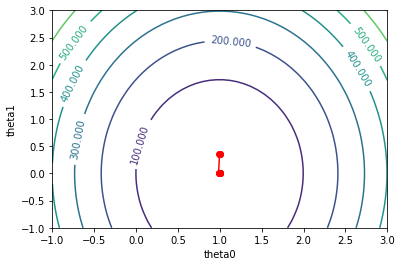

In [59]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#plt.style.use('seaborn-pastel')

x = theta0
y = theta1
fig = plt.figure()
#ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
ax = fig.add_subplot(111)
cp=ax.contour(x,y,cost_plot)
ax.clabel(cp, inline=1, fontsize=10)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')

points, = ax.plot([], [], marker='o', c='r')
xdata, ydata = [], []
def init():
    points.set_data([], [])
    return points,
def animate(i):
    xdata.append(np.ravel(theta_all0)[i])
    ydata.append(np.ravel(theta_all1)[i])
    points.set_data(xdata, ydata)
    return points,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, 100), blit=True)
HTML(anim.to_html5_video())
#fig.savefig('plot_anim.png', dpi=1000, bbox_inches='tight')

#anim.save('plot_anim.gif', writer='imagemagick')